# **Item Demand Forecasting**

* Demand forecasts are fundamental to plan and deliver products and services. Accurate forecasting of demand can help the manufacturers to maintain appropriate stock which results in reduction in loss due to product not being sold and also reduces the opportunity cost (i.e. higher demand but less availability => opportunity lost). Despite such relevance, manufacturers have difficulty choosing which forecast model is the best for their use case. 

* In this project, historical sales data corresponding to multiple(25) items sold in 10 stores are provided and participants are expected to come up with a best model to predict the future demand for products which results in maximum profit for the manufacturer. 

* Predict the demand for the next 3 months at the item level (i.e. all the stores combined).

#### The end objective of the participant is to produce a model that gives the best prediction to the manufacturer. Such a model must include the seasonality of the items sold. 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv('/content/sale_data.csv', 
                     parse_dates=['date'], 
                     index_col=['date'])

In [3]:
data.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [4]:
data.shape

(913000, 3)

In [5]:
data.columns

Index(['store', 'item', 'sales'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   store   913000 non-null  int64
 1   item    913000 non-null  int64
 2   sales   913000 non-null  int64
dtypes: int64(3)
memory usage: 27.9 MB


In [7]:
data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [8]:
data.isnull().sum()

store    0
item     0
sales    0
dtype: int64

In [9]:
data.nunique()

store     10
item      50
sales    213
dtype: int64

In [10]:
data['item'].value_counts()

1     18260
38    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
39    18260
2     18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
27    18260
26    18260
25    18260
24    18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
50    18260
Name: item, dtype: int64

In [11]:
# Sorting data by date in ascending order
data = data.sort_values('date', ascending=True)
data.head(10)

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-01,7,12,26
2013-01-01,7,46,27
2013-01-01,8,12,54
2013-01-01,9,12,35
2013-01-01,10,12,41
2013-01-01,6,46,23
2013-01-01,1,13,37
2013-01-01,2,13,51


In [12]:
print("There are totally",data['item'].nunique(),"Unique Items.")

There are totally 50 Unique Items.


In [13]:
data=data.groupby(['item','date'])['sales'].sum().reset_index()

In [14]:
data

,item,date,sales
0,1,2013-01-01,133
1,1,2013-01-02,99
2,1,2013-01-03,127
3,1,2013-01-04,145
4,1,2013-01-05,149
...,...,...,...
91295,50,2017-12-27,511
91296,50,2017-12-28,587
91297,50,2017-12-29,596
91298,50,2017-12-30,612


In [15]:
# Rolling sum of sales for 3 months per date per item
datas=[]
for i in data.item.unique():
    tmp=data.loc[data.item==i,:]
    tmp['sales']=tmp['sales'].rolling(90).sum().shift(-89)
    datas.append(tmp)

In [16]:
# dropping null values
for i in range(len(datas)):
    datas[i]=datas[i].dropna(axis=0)

Enter the item number to view sales of each item : 8


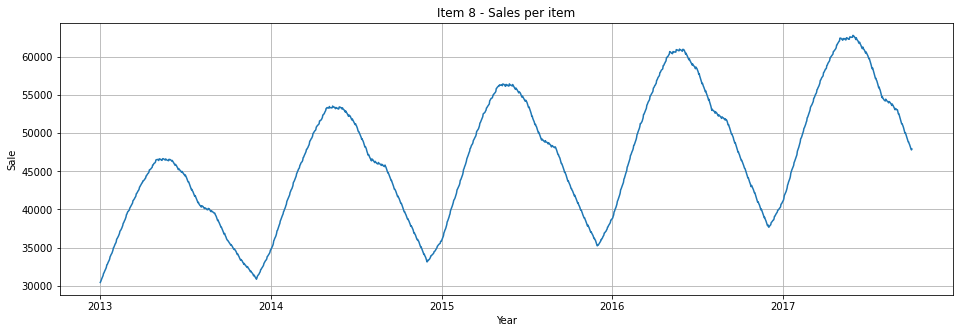

In [17]:
# To view insights of items sale in each store

def plot_item(df_raw,i):
    plt.subplots(figsize = (16, 5))
    plt.grid()
    plt.xlabel("Year")
    plt.ylabel("Sale")
    plt.title('Item '+str(i)+' - Sales per item')
    plt.plot(df_raw['date'],df_raw['sales'])

#for i in range(1,df_raw['item'].nunique()+1):

item_input=int(input("Enter the item number to view sales of each item : "))
plot_item(datas[item_input],item_input)

**Sale is always high during the middle of the year.**

In [18]:
# Date Features
def create_date_features(datas):
    for i in range(len(datas)):
        datas[i]['year'] = datas[i].date.dt.year
        datas[i]['day_of_year'] = datas[i].date.dt.dayofyear
        datas[i]['month'] = datas[i].date.dt.month
        datas[i]['day_of_month'] = datas[i].date.dt.day
        datas[i]['week'] = datas[i].date.dt.weekofyear
        datas[i]['day_of_week'] = datas[i].date.dt.dayofweek
        datas[i]["is_wknd"] = datas[i].date.dt.weekday //5
        datas[i]['is_month_start'] = datas[i].date.dt.is_month_start.astype(int)
        datas[i]['is_month_end'] = datas[i].date.dt.is_month_end.astype(int)
    return datas

datas = create_date_features(datas)

In [19]:
datas[49]

,item,date,sales,year,day_of_year,month,day_of_month,week,day_of_week,is_wknd,is_month_start,is_month_end
89474,50,2013-01-01,38720.0,2013,1,1,1,1,1,0,1,0
89475,50,2013-01-02,38874.0,2013,2,1,2,1,2,0,0,0
89476,50,2013-01-03,39034.0,2013,3,1,3,1,3,0,0,0
89477,50,2013-01-04,39200.0,2013,4,1,4,1,4,0,0,0
89478,50,2013-01-05,39378.0,2013,5,1,5,1,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91206,50,2017-09-29,62200.0,2017,272,9,29,39,4,0,0,0
91207,50,2017-09-30,61962.0,2017,273,9,30,39,5,1,0,1
91208,50,2017-10-01,61687.0,2017,274,10,1,39,6,1,1,0
91209,50,2017-10-02,61392.0,2017,275,10,2,40,0,0,0,0


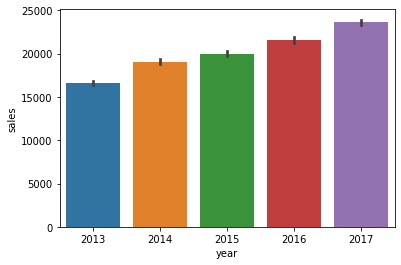

In [20]:
# sales per year
sns.barplot(datas[0]['year'],datas[0]['sales'])

**Above graph implements that there is frequent increase in sales each year**

**Linear relationship between year and target**

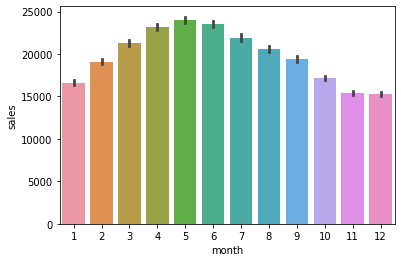

In [21]:
# Sales per month
sns.barplot(datas[0]['month'],datas[0]['sales'])

**Above graph implements that sale is high during the middle of the year**

**No Linear relationship between month and target**

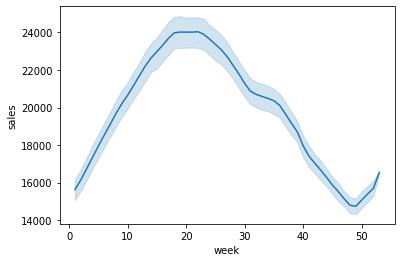

In [22]:
# Sales per week
sns.lineplot(datas[0]['week'],datas[0]['sales'])

**No Linear relationship between week and target**

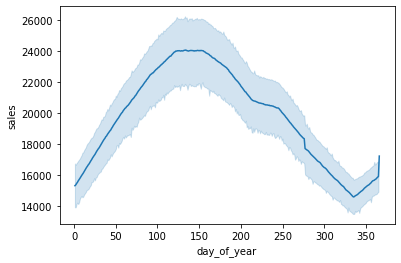

In [23]:
# Sales per day of year
sns.lineplot(datas[0]['day_of_year'],datas[0]['sales'])

**No Linear relationship between week and target**

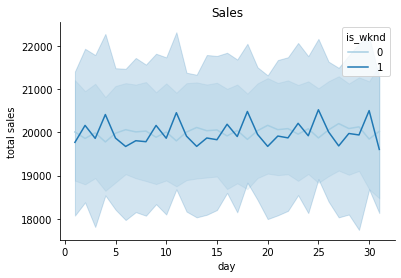

In [24]:
# Set the color palette
sns.set_palette(sns.color_palette("Paired"))
# Plot the data, specifying a different color for data points in
# each of the day categories (weekday and weekend)
ax = sns.lineplot(x='day_of_month', y='sales', data=datas[0], hue='is_wknd')
# Customize the axes and title
ax.set_title("Sales")
ax.set_xlabel("day")
ax.set_ylabel("total sales")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [25]:
X=datas[0][['date']].values.astype('object')
y=datas[0]['sales']

## **Train test split**

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=0)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1389, 1), (348, 1), (1389,), (348,))

## **Decision Tree**

In [29]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60,70,100,150]:
  dt= DecisionTreeRegressor(max_depth= depth,random_state=0)
  dt.fit(X_train, y_train)
  accuracy= r2_score(y_test,dt.predict(X_test))
  val= cross_val_score(dt, X, y, cv=10)
  print('K:',depth,'R2 Score:',accuracy,'Cross Val Score:',np.mean(val))

K: 1 R2 Score: 0.27657257919438527 Cross Val Score: -1.555509973566794
K: 2 R2 Score: 0.46740111544770346 Cross Val Score: -0.7680195252541806
K: 3 R2 Score: 0.6561257406116687 Cross Val Score: -1.1662396300761022
K: 4 R2 Score: 0.7619484420425446 Cross Val Score: -0.1925923876157965
K: 5 R2 Score: 0.9220893878921026 Cross Val Score: -0.17397187879597345
K: 6 R2 Score: 0.9602414185752652 Cross Val Score: -0.03622379619446562
K: 7 R2 Score: 0.9866941888028312 Cross Val Score: 0.0917055053557266
K: 8 R2 Score: 0.9924425536351316 Cross Val Score: 0.051528062975861676
K: 9 R2 Score: 0.9972391012268716 Cross Val Score: 0.08163044233635877
K: 10 R2 Score: 0.9985495384395514 Cross Val Score: 0.07476351929338995
K: 20 R2 Score: 0.999579264948905 Cross Val Score: 0.07789765369095207
K: 40 R2 Score: 0.999579264948905 Cross Val Score: 0.07789765369095207
K: 60 R2 Score: 0.999579264948905 Cross Val Score: 0.07789765369095207
K: 70 R2 Score: 0.999579264948905 Cross Val Score: 0.07789765369095207
K:

In [30]:
dt= DecisionTreeRegressor(max_depth= 7,random_state=0)
dt.fit(X_train, y_train)
pred= dt.predict(X_test)
accuracy= r2_score(y_test,pred)
print(accuracy)

0.9866941888028312


In [31]:
data2= pd.DataFrame({"Actual": y_test, "Predicted": pred})
data2

,Actual,Predicted
1608,26871.0,26737.448980
1268,25346.0,24794.600000
1508,21539.0,21402.666667
161,19651.0,19410.653846
520,23018.0,22269.637363
...,...,...
1339,21803.0,21807.777778
518,23128.0,22269.637363
133,19873.0,19410.653846
202,17814.0,17764.833333


## **K Nearest Neighbour**

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsRegressor(i)                #best value of k = 2, 0.9997275990911649
  knn.fit(X_train, y_train)
  print("K value  :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  : 1 Cross Value Accuracy : 0.9994943342388982
K value  : 2 Cross Value Accuracy : 0.9997275990911649
K value  : 3 Cross Value Accuracy : 0.9996748948900157
K value  : 4 Cross Value Accuracy : 0.9996839628610019
K value  : 5 Cross Value Accuracy : 0.9996489906488037
K value  : 6 Cross Value Accuracy : 0.9996182026221391
K value  : 7 Cross Value Accuracy : 0.9996018536766768
K value  : 8 Cross Value Accuracy : 0.9995842806791057
K value  : 9 Cross Value Accuracy : 0.9995434662732547
K value  : 10 Cross Value Accuracy : 0.9994925973270622
K value  : 20 Cross Value Accuracy : 0.9985429604715428
K value  : 30 Cross Value Accuracy : 0.9966845815862813
K value  : 40 Cross Value Accuracy : 0.9936918128532308
K value  : 50 Cross Value Accuracy : 0.9893333444400174


## **Random Forests**

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.999579264948905

## **XG Boost**

In [35]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_test,y_test), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -3.7829660045480002  Cross-Val score :  -3.5628654941848823
Learning rate :  0.02  Train score :  0.22434665506681284  Cross-Val score :  0.2612414111710245
Learning rate :  0.03  Train score :  0.8268155083762557  Cross-Val score :  0.8279781819599128
Learning rate :  0.04  Train score :  0.9296229414122434  Cross-Val score :  0.9221918604075714
Learning rate :  0.05  Train score :  0.9523746308658572  Cross-Val score :  0.9514617433710969
Learning rate :  0.1  Train score :  0.9940286522819064  Cross-Val score :  0.9923527749145343
Learning rate :  0.11  Train score :  0.9960902270260504  Cross-Val score :  0.9944519402880726
Learning rate :  0.12  Train score :  0.996614712785462  Cross-Val score :  0.9958299303990514
Learning rate :  0.13  Train score :  0.9974120865398864  Cross-Val score :  0.9969521326176107
Learning rate :  0.14  Train score :  0.9973829411461546  Cross-Val score :  0.9974065284932143
Learning rate :  0.15  Train score :  0

## **Conclusion**

#### Forecasting future demands is a challenge that companies have to face in order to be able to make decisions that allow them to compete by generating better supply chain results. Demand forecasting is an essential activity for business planning, as it results in several benefits, such as: reduced waste, better allocation of resources, increased sales and revenue. This way, it helps organizations to be in the right place, at the right time, with the right product.